# Bear 2 - Introduction to Model Extraction

## Objective

You've stumbled upon an API endpoint that returns the measurements of a bear's mood (specifically happiness) from an input value of the bear's hunger (a value between 0 and 100).

Your goal is to perform model extraction on this model to understand the internal relationship between these features in the model. Once you've determined the coefficient value associated with a bear's hunger and happiness you can submit to the api endpoint to recieve the flag.

## What is Model Extraction?

Model extraction is a technique used to infer the properties, structure, or parameters of a machine learning model based solely on its outputs. This process can reveal insights about how input variables are transformed into predictions, allowing for the replication or analysis of the model without direct access to its internal workings. It plays a crucial role in understanding proprietary, black-box models, ensuring transparency and fairness in machine learning applications.

## Challenge Setup

You are provided with access to a machine learning model through an API endpoint. This endpoint accepts a parameter named Hunger, representing the hunger level of a bear on a scale from 0 to 100 (inclusive), and returns the bear's Happiness level as a response. Although this scenario is simplified, it presents a practical introduction to the strategies and considerations involved in model extraction.

## Below are the steps we will walk through to solve this challenge

1. `Explore the Endpoint`: Begin by making initial requests to the API with varied Hunger values. Note the structure of the responses and any patterns or anomalies in the Happiness outputs. This step helps you understand the range and type of data you'll be working with.

2. `Data Collection`: Systematically collect data points by sending requests across the entire range of Hunger values (0-100). Consider automating this process with a script that iterates through possible Hunger values, capturing the corresponding Happiness levels. This dataset will be foundational for your analysis.

3. `Analysis`: With your collected data, analyze the relationship between Hunger and Happiness. Look for trends, such as linear relationships, curvatures, or discrete jumps, that can give clues about the underlying model.

4. `Model Replication`: Based on your analysis, attempt to replicate the model's behavior. This could involve fitting a regression model, using machine learning algorithms, or applying mathematical theories to approximate the discovered relationship.

5. `Extraction and Reporting`: Finally, extract the coefficient that quantifies the relationship between Hunger and Happiness. Submit this to the endpoint to recieve the flag!

In this challenge we are given access to a machine learning model through an API endpoint. The endpoint takes in the `Hunger` value of a bear (values between 1-100) and return the `Happiness` of the bear. This is a simple example but will help us understand the techniques we can use to extract data.

Lets start by testing the API endpoint and seeing what types of outputs we get.

## Setup

In order to interact with the challenge, you will need your API Key.

You can find this key in the Crucible platform in this challenge.

[https://crucible.dreadnode.io/challenges/bear2](https://crucible.dreadnode.io/challenges/bear2)

In [1]:
CRUCIBLE_API_KEY = "Xg5cjQoamNuVJ-FlCnbKtO5rzu8u_xzi"  # Replace with your actual API key

### Install Required Packages

Install the required packages.


In [2]:
%pip install requests --quiet
%pip install pandas --quiet 
%pip install numpy --quiet 
%pip install scikit-learn --quiet 
%pip install joblib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Set Notebook Variables

Set the variables used throughout the notebook


In [3]:
CHALLENGE = "bear2"
CRUCIBLE_URL = "https://crucible.dreadnode.io"
CHALLENGE_URL = "https://bear2.crucible.dreadnode.io"

In [4]:
import numpy as np
import requests

input_data = {"hunger": 5}


def query(input_data):
    payload = {"data": input_data}
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    response = requests.post(
        "https://bear2.crucible.dreadnode.io/score",
        headers=headers,
        json=input_data
    )

    return response.json()


response = query(input_data)
print(response)

{'outputs': [97.49999999999997]}


## Step 1: Explore the Endpoint

Lets start by trying different requests to the endpoint and seeing what we get back. It's best not to make any assumptions at this point to see if there are any potential approaches to extracting more information about the model.

We will use the `query` function provided to access the endpoint. **Note** you must replace the API_KEY with your own key for this challenge.

In [5]:
query({"hunger": 5})

{'outputs': [97.49999999999997]}

In [6]:
query({"hunger": 0})

{'outputs': [99.99999999999997]}

In [7]:
query({"hunger": -5})

{'message': 'Invalid input. hunger should be a value between 0 and 100'}

In [8]:
query({"hunger": 999})

{'message': 'Invalid input. hunger should be a value between 0 and 100'}

In [9]:
query({"hunger": 'test'})

{'message': 'Invalid input. Input should be a valid number, unable to parse string as a number.'}

In [10]:
query({"hunger": 50.00000000000000000000001})

{'outputs': [74.99999999999997]}

In [11]:
query({"coef": 0.1})

{'message': 'Incorrect coefficient. Try again.'}

## Step 2: Data Collection

In this phase, we systematically explore the relationship between the bear's hunger and its happiness by querying the API across the entire range of hunger values, from 0 to 100. This comprehensive data collection is essential for accurately modeling the underlying relationship.

To ensure we capture every possible value, our loop will include the upper boundary by iterating from 0 to 100, inclusive. Automating this process with a script not only saves time but also guarantees the precision of our data collection effort.

Here's how we can automate the data collection:

In [12]:
results = {} # Store the results from the endpoint here

for h in range(101):
    response = query({"hunger": h})
    results[h] = response['outputs'][0]

This step is crucial for building a dataset that represents the full spectrum of the model's input-output relationship. With this data in hand, we can begin to analyze how changes in hunger affect the bear's happiness, setting the stage for accurately replicating and eventually extracting the model's internal mechanics.



# Step 3: Analysis

With a comprehensive dataset of hunger and happiness values now at our disposal, the next step is to analyze these data to discern patterns, trends, or relationships that could hint at the underlying model the API uses. This analysis is important in understanding how changes in hunger levels influence happiness scores, thereby revealing insights into the model's structure.

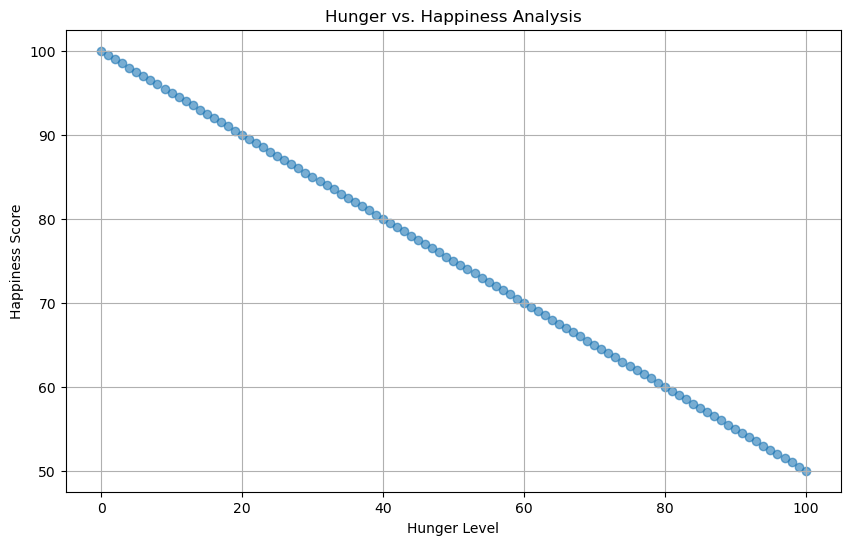

In [13]:
import pandas as pd # For data analysis
import matplotlib.pyplot as plt

df = pd.DataFrame(list(results.items()), columns=['Hunger', 'Happiness'])

# Plotting Hunger vs. Happiness
plt.figure(figsize=(10, 6))
plt.scatter(df['Hunger'], df['Happiness'], alpha=0.6)
plt.title('Hunger vs. Happiness Analysis')
plt.xlabel('Hunger Level')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

A scatter plot is particularly useful for this type of analysis as it allows you to visually inspect the relationship between the two variables.

1. `Trend Identification`: After plotting, look for any apparent trends. A linear trend might suggest a simple linear relationship, whereas a curve could indicate a polynomial relationship. Discrete jumps or plateaus might imply conditional logic within the model.

2. `Hypothesis Formulation`: Based on your observations, formulate hypotheses about the model's behavior. For instance, if the plot shows a linear relationship, one might hypothesize that the model uses a linear equation to relate hunger to happiness.

3. `Preliminary Conclusions`: Draw preliminary conclusions about the potential model structure. These insights will guide the replication efforts in the next step.

Some other things to consider:

1. `Linearity`: If the relationship appears linear, the model might be using a simple linear regression. The slope of the line could directly indicate the coefficient we're seeking.
2. `Non-Linearity`: For non-linear relationships, consider more complex models or transformations. Polynomial regression or non-linear models may be required.
3. `Anomalies`: Keep an eye out for any outliers or anomalies in the data that could indicate exceptions in the model's logic.


This analytical step is foundational, setting the stage for accurately modeling the observed relationship in the subsequent steps. By understanding the nature of the data, we can tailor our model replication efforts to mirror the API's behavior as closely as possible.



# Step 4. Model Replication

After analyzing the data and identifying potential relationships between hunger and happiness, the next step is to attempt replicating the model's behavior. This involves using the insights gained from your analysis to construct a model that closely mimics the API's output patterns. The goal of model replication is to understand and replicate the decision-making process of the original model as closely as possible.

Choosing the Right Model:

Based on the trends and patterns identified in the previous step, decide on the type of model that best fits the observed data. For a linear relationship, a simple linear regression model may suffice. If the relationship appears more complex, consider using polynomial regression or another suitable model.

Model Replication Process:

1. `Prepare the Data`: Convert your collected data into a format suitable for model training. If you're using a linear regression model, your existing dataset format should be adequate.

2. `Select a Modeling Tool`: Choose a tool or library that fits your chosen model type. For linear and polynomial regression, libraries like scikit-learn in Python are ideal due to their simplicity and extensive documentation.

In [14]:
from sklearn.linear_model import  LinearRegression

lr = LinearRegression() # Create a simple linear regression model

lr.fit(df[['Hunger']], df['Happiness'])

LinearRegression()

### Model Validation:

Validate your replicated model by predicting happiness levels for a new set of hunger values not used in the training phase. This step ensures that your model can generalize well and accurately reflects the original model's behavior.

## Step 5. Extraction and Reporting

Having successfully replicated the model in Step 4, the final task involves extracting the key insights, specifically the coefficient(s) that define the relationship between a bear's hunger and its happiness. This step is crucial for understanding the underlying mechanics of the model and for fulfilling the challenge's objective by submitting the extracted coefficient to receive the flag.

In [15]:
lr.coef_

array([-0.5])

## Submit and Receive Your Flag

Lets submit the coef and see if it gets us to result.

In [21]:
coef_data = {"coef": "-0.5"}

query(coef_data)

{'flag': 'gAAAAABnG9YjIsPoU9g1lmXK9cbPf-UN5Xr7W3cXIUljT1dflY85iJGxFsXzajpCYk0KbsnnEdQfTeznscJOFZUqT2une8dvSiwz3I8oAHUHhGkdDuU9wHQU9J0xhfFSDDJPI4sebIxNoMAdAY0Ty7ouTkp3wINKvkBmjVKSxgxooek9NIYFktJ2EmT-B2JXmTIy1SuSzQIl'}

## Submit Your Flag

Once you have the flag you can use the following function to submit the flag to Crucible. Alternatively you can submit it direction on the Crucible website.

In [22]:
import requests


def submit_flag(flag):
    url = f"{CRUCIBLE_URL}/api/challenges/{CHALLENGE}/submit-flag"
    headers = {"X-API-Key": CRUCIBLE_API_KEY}
    payload = {"challenge": CHALLENGE, "flag": flag}
    response = requests.post(url, headers=headers, json=payload)
    if response.status_code == 200:
        if response.json().get("correct") is True:
            print("The flag was correct. Congrats!")
        else:
            print("The flag was incorrect. Keep trying!")
    else:
        print("There was an error submitting your flag")
        print(response.text)
        
flag = "gAAAAA..."  # Replace with the flag once you find it
submit_flag(flag)

The flag was correct. Congrats!


## Conclusion

Engaging in model extraction challenges offers a unique lens through which to understand and interact with machine learning models. This journey not only sharpens your analytical and problem-solving skills but also deepens your appreciation for the complexity inherent in these models. Through practical experience, you gain insights into how models interpret data and make predictions, equipping you with a versatile toolkit for tackling real-world data science challenges. Such endeavors underscore the importance of critical thinking and adaptability, foundational qualities for success in the ever-evolving landscape of machine learning and data science.
